In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


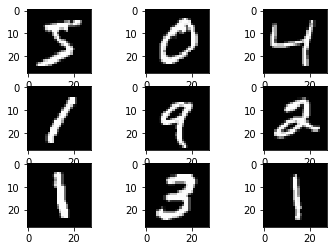

In [2]:
# example of loading the mnist dataset
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [15]:
X_train = (trainX/ 255.0).reshape(trainX.shape[0],28*28)
X_test = (testX/ 255.0).reshape(testX.shape[0],28*28)

y_train = trainy
y_test  = testy

In [14]:
X_train.reshape(60000,28*28)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
clf = MLPClassifier(max_iter=500,hidden_layer_sizes=(1000,))

clf.fit(X_train, y_train)
print('Training accuracy:', clf.score(X_train, y_train))
print('Test accuracy:', clf.score(X_test, y_test))

Training accuracy: 0.99855
Test accuracy: 0.9807


In [26]:
X_test.shape

(10000, 784)

In [29]:
clf.predict_proba(X_test[1,:].reshape(1,28*28))[0]

array([9.45560641e-17, 7.24700555e-11, 9.99999999e-01, 8.31907525e-12,
       4.45873502e-29, 6.43558062e-17, 5.47019921e-16, 1.25513824e-22,
       4.32545579e-10, 1.08260744e-23])

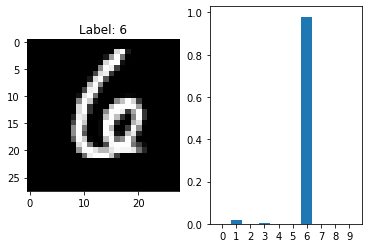

In [42]:
import numpy as np

index = 123

plt.subplot(1,2,1)
image_values = X_test[index,:]
image_label = y_test[index]
plt.imshow(image_values.reshape(28,28), cmap ='gray')
plt.title('Label: ' + str(image_label))

plt.subplot(1,2,2)
plt.bar(np.linspace(0,9,10),clf.predict_proba(X_test[index,:].reshape(1,28*28))[0])
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.show()